<a href="https://colab.research.google.com/github/Atrib99/Python_Projects/blob/master/Game_Theory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

No saddle point found.
Mixed strategy for row player: [0. 0. 1.]
Mixed strategy for column player: [0. 0. 1.]
Row dominant strategies: []
Column dominant strategies: []


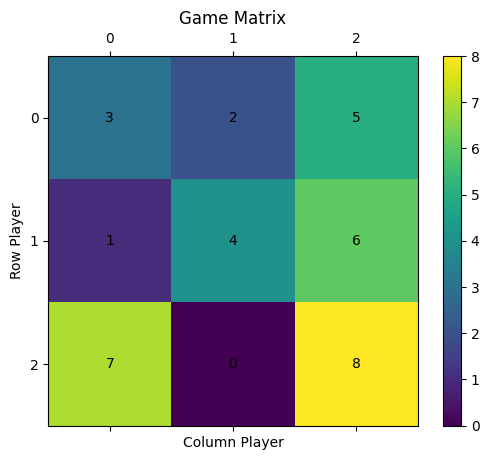

In [21]:
import numpy as np
import matplotlib.pyplot as plt

def saddle_point(matrix):
    """
    Find the saddle point of a given matrix, if it exists.
    """
    min_of_rows = np.max(matrix, axis=1)
    max_of_columns = np.min(matrix, axis=0)

    max_of_rows_min = np.argmax(min_of_rows)
    min_of_columns_max = np.argmin(max_of_columns)

    if max_of_rows_min == min_of_columns_max:
        return (max_of_rows_min, min_of_columns_max)
    else:
        return None

def mixed_strategy(matrix):
    """
    Calculate the mixed strategy of a given matrix.
    """
    num_rows, num_columns = matrix.shape

    row_player_strategy = np.zeros(num_rows)
    column_player_strategy = np.zeros(num_columns)

    saddle_point_index = saddle_point(matrix)

    if saddle_point_index:
        row, col = saddle_point_index
        row_player_strategy[row] = 1.0
        column_player_strategy[col] = 1.0
    else:
        row_player_payoffs = np.zeros(num_rows)
        column_player_payoffs = np.zeros(num_columns)

        for i in range(num_rows):
            row_player_payoffs[i] = np.min(matrix[i, :])

        min_payoff_row = np.min(row_player_payoffs)
        min_payoff_row_index = np.where(row_player_payoffs == min_payoff_row)[0]

        for j in range(num_columns):
            column_player_payoffs[j] = np.max(matrix[:, j])

        max_payoff_col = np.max(column_player_payoffs)
        max_payoff_col_index = np.where(column_player_payoffs == max_payoff_col)[0]

        row_player_strategy[min_payoff_row_index] = 1.0 / len(min_payoff_row_index)
        column_player_strategy[max_payoff_col_index] = 1.0 / len(max_payoff_col_index)

    return row_player_strategy, column_player_strategy

def is_dominant(matrix, player, strategy_index):
    """
    Check if a given strategy is dominant for a player.
    """
    num_rows, num_columns = matrix.shape

    if player == "row":
        row_strategy = matrix[strategy_index, :]
        for i in range(num_rows):
            if not np.all(row_strategy >= matrix[i, :]):
                return False
    elif player == "column":
        column_strategy = matrix[:, strategy_index]
        for j in range(num_columns):
            if not np.all(column_strategy <= matrix[:, j]):
                return False
    return True

def plot_game(matrix):
    """
    Plot the game matrix.
    """
    fig, ax = plt.subplots()
    cax = ax.matshow(matrix, cmap='viridis')

    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            ax.text(j, i, matrix[i, j], va='center', ha='center')

    plt.xlabel('Column Player')
    plt.ylabel('Row Player')
    plt.title('Game Matrix')
    plt.colorbar(cax)
    plt.show()

# Example usage
matrix = np.array([[3, 2, 5],
                   [1, 4, 6],
                   [7, 0, 8]])

saddle = saddle_point(matrix)
if saddle:
    print("Saddle point found at:", saddle)
else:
    print("No saddle point found.")

row_strategy, column_strategy = mixed_strategy(matrix)
print("Mixed strategy for row player:", row_strategy)
print("Mixed strategy for column player:", column_strategy)

row_dominant_strategies = [i for i in range(matrix.shape[0]) if is_dominant(matrix, "row", i)]
column_dominant_strategies = [j for j in range(matrix.shape[1]) if is_dominant(matrix, "column", j)]

print("Row dominant strategies:", row_dominant_strategies)
print("Column dominant strategies:", column_dominant_strategies)

plot_game(matrix)
